In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['alligator','alpaca','antelope','badger','bat','bear','bee','beetle','bison','boar','Brown-Headed Barbet','Buffalo','butterfly','cat','caterpillar','Cattle Egret','chicken','chimpanzee','cockroach','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','coyote','crab','crocodile','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','Forest Wagtail','fox','gharial','goat','goldfish','goose','gorilla','grasshopper','Gray Wagtail','Green Bee-Eater','hamster','hare','hedgehog','hippopotamus','Hoopoe','hornbill','horse','House Crow','hummingbird','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','jellyfish','Jungle Babbler','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','Northern Lapwing','octopus','okapi','orangutan','otter','owl','ox','panda','pangolin','parrot','Peacock','pelecaniformes','penguin','pig','pigeon','porcupine','possum','Python','raccoon','Red-Wattled Lapwing','reindeer','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','sandpiper','Sarus Crane','seahorse','seal','shark','sheep','sparrow','spider','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','wombat','woodpecker','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 99.75it/s]


100%|███████████████████████████████████████████████████████████| 1074/1074 [00:02<00:00, 509.95it/s]


Loading test_set


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 333.28it/s]


100%|████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 61.12it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='elu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.2),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.15),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(122, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=500)

Epoch 1/500
504/504 [==============================] - 19s 26ms/step - loss: 3.6429 - accuracy: 0.1568
Epoch 2/500
504/504 [==============================] - 13s 26ms/step - loss: 2.7542 - accuracy: 0.3338
Epoch 3/500
504/504 [==============================] - 13s 26ms/step - loss: 2.3560 - accuracy: 0.4151
Epoch 4/500
504/504 [==============================] - 13s 26ms/step - loss: 2.0694 - accuracy: 0.4747
Epoch 5/500
504/504 [==============================] - 13s 26ms/step - loss: 1.9199 - accuracy: 0.5068
Epoch 6/500
504/504 [==============================] - 13s 26ms/step - loss: 1.7777 - accuracy: 0.5399
Epoch 7/500
504/504 [==============================] - 13s 26ms/step - loss: 1.6664 - accuracy: 0.5641
Epoch 8/500
504/504 [==============================] - 13s 26ms/step - loss: 1.5399 - accuracy: 0.5923
Epoch 9/500
504/504 [==============================] - 13s 26ms/step - loss: 1.4411 - accuracy: 0.6160
Epoch 10/500
504/504 [==============================] - 13s 26ms/step - l

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropInput' defined at (most recent call last):
    File "C:\Users\ryan9\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ryan9\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ryan9\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\ryan9\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ryan9\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\ryan9\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\ryan9\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\ryan9\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\ryan9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ryan9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ryan9\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ryan9\AppData\Local\Temp\ipykernel_8324\918848513.py", line 1, in <module>
      history = model.fit(train_images, train_labels,
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\ryan9\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropInput'
OOM when allocating tensor with shape[128,512,8,8] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/conv2d_2/Conv2D/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1154]

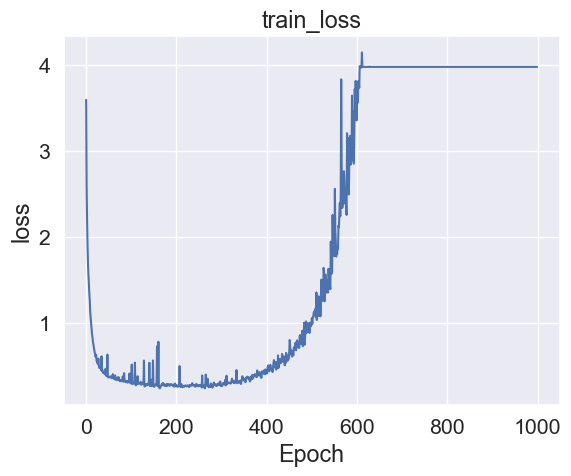

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

22/22 [==============================] - 2s 6ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.04316546762589928


In [ ]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [13]:
'存模型&讀模型'
from keras.models import load_model
model.save("31003-01_model")

INFO:tensorflow:Assets written to: first_gpu_model\assets


INFO:tensorflow:Assets written to: first_gpu_model\assets
